In [1]:
from google.colab import files
uploaded = files.upload()

Saving breastmnist.npz to breastmnist (2).npz


In [2]:
import numpy as np
folder = np.load("breastmnist.npz")
files = folder.files

for file in files:
  print(file)

train_images
val_images
test_images
train_labels
val_labels
test_labels


In [3]:
train_images = folder['train_images.npy']
val_images = folder['val_images.npy']
test_images = folder['test_images.npy']
train_labels = folder['train_labels.npy']
val_labels = folder['val_labels.npy']
test_labels = folder['test_labels.npy']

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(val_images.shape)
print(val_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(546, 28, 28)
(546, 1)
(78, 28, 28)
(78, 1)
(156, 28, 28)
(156, 1)


In [5]:
train_images = train_images.astype('float32')
train_images = train_images / 255
val_images = val_images.astype('float32')
val_images = val_images / 255
test_images = test_images.astype('float32')
test_images = test_images /255

print(train_images[0])

[[0.54509807 0.54509807 0.5411765  0.54509807 0.5568628  0.58431375
  0.6117647  0.62352943 0.6431373  0.654902   0.65882355 0.6392157
  0.6509804  0.6627451  0.6431373  0.6509804  0.63529414 0.61960787
  0.6431373  0.6117647  0.6117647  0.64705884 0.6313726  0.6039216
  0.6117647  0.64705884 0.63529414 0.64705884]
 [0.32941177 0.36078432 0.36862746 0.32941177 0.32941177 0.3372549
  0.36862746 0.42745098 0.5058824  0.5294118  0.5137255  0.50980395
  0.53333336 0.49019608 0.43529412 0.46666667 0.45882353 0.4745098
  0.5137255  0.45882353 0.5176471  0.52156866 0.52156866 0.54509807
  0.54901963 0.4862745  0.45490196 0.4392157 ]
 [0.32941177 0.32156864 0.34117648 0.39607844 0.39607844 0.3764706
  0.3529412  0.37254903 0.41568628 0.38039216 0.3372549  0.38039216
  0.45490196 0.41960785 0.35686275 0.3372549  0.3019608  0.35686275
  0.5019608  0.5058824  0.5058824  0.50980395 0.53333336 0.53333336
  0.5019608  0.4862745  0.49803922 0.49411765]
 [0.3254902  0.3019608  0.37254903 0.47058824 0.

In [6]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

train_images = np.expand_dims(train_images,axis=3)
val_images = np.expand_dims(val_images,axis=3)
test_images = np.expand_dims(test_images,axis=3)

print(train_images.shape)

(546, 28, 28, 1)


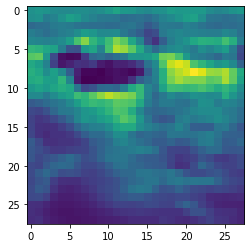

In [7]:
plt.imshow(image.array_to_img(train_images[1]))

In [8]:
import keras
import keras.models as models
import keras.layers as layers

model = models.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002),
              loss=keras.losses.binary_crossentropy,
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [9]:
history = model.fit(train_images,train_labels,batch_size=16,epochs=50,validation_data=(val_images,val_labels))

Epoch 1/50
35/35 [==============================] - 2s 15ms/step - loss: 1.9400 - acc: 0.7179 - val_loss: 0.6546 - val_acc: 0.7308
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6442 - acc: 0.7320 - val_loss: 0.5649 - val_acc: 0.7308
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.5449 - acc: 0.7528 - val_loss: 0.5497 - val_acc: 0.7308
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.5413 - acc: 0.7301 - val_loss: 0.5753 - val_acc: 0.7308
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.5622 - acc: 0.7336 - val_loss: 0.5478 - val_acc: 0.7308
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.5480 - acc: 0.7308 - val_loss: 0.5440 - val_acc: 0.7308
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5579 - acc: 0.7821 - val_loss: 0.5676 - val_acc: 0.7308
Epoch 8/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5665 - acc: 0.7

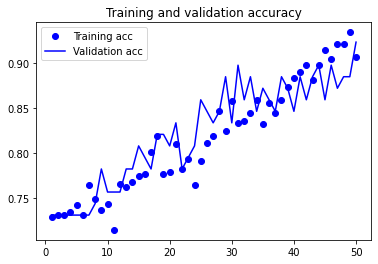

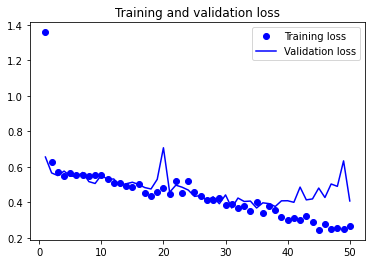

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import classification_report

predictions = model.predict(test_images)
print(predictions[4])
print(test_labels[4])

p = np.round(predictions)

print(classification_report(test_labels,p))

[0.9870897]
[1]
              precision    recall  f1-score   support

           0       0.79      0.64      0.71        42
           1       0.88      0.94      0.91       114

    accuracy                           0.86       156
   macro avg       0.84      0.79      0.81       156
weighted avg       0.85      0.86      0.85       156



In [12]:
# accuracy is not a suitable metric for evaluation
# because dataset is imbalanced
result = model.evaluate(test_images, test_labels)
print("accuracy on test data: ",result[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.4764 - acc: 0.8590
accuracy on test data:  0.8589743375778198


In [13]:
(unique, counts) = np.unique(train_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0 147]
 [  1 399]]
